In [21]:
import pandas as pd

## Pandas

In [22]:
Data = pd.read_excel('data.xlsx', encoding = 'utf-8' )

In [23]:
Data.drop([u'Фамилия Имя Отчество', 
           u'E-mail адрес', 
           u'Ссылка на личный вебсайт',
           u'Ссылка на профиль в LinkedIn', 
           u'Ссылка на страницу в Facebook', 
           u'Согласие на обработку данных',
           u'Группа',
           u'Факультет',
           u'Есть ли у вас научные публикации / доклады?',
           'Timestamp' ], axis = 1, inplace = True)

1. Выясните сколько людей ответило верно на вопрос 'Сколько листьев имеет полное двоичное дерево высоты 3?'
2. Замените пропуски в признаке 'GPA (Средний балл)' на среднее значение данного признака.
3. Извлеките из признака 'Дата рождения' день, месяц, год рождения. 
4. Вычислите средний балл студентов родившихся зимой.
5. Постройте гистограмму распределения признака 'Какой ваш уровень владения английским языком?'



#### 1. (0.5 балла) Выясните сколько людей ответило верно на вопрос 'Сколько листьев имеет полное двоичное дерево высоты 3?'

In [24]:
(Data[u'Сколько листьев имеет полное двоичное дерево высоты 3?']==8).sum()

81

#### 2. (0.5 балла) Замените пропуски в признаке 'GPA (Средний балл)' на среднее значение данного признака.

In [25]:
Data.loc[Data[u'GPA (Средний балл)'].isnull(), u'GPA (Средний балл)'] = Data[u'GPA (Средний балл)'].mean()

#### 3. (1 балл) Извлеките из признака 'Дата рождения' день, месяц, год рождения. Добавьте три новых соответствующих признака и удалите признак   'Дата рождения'

In [26]:
Data[u'Год рождения'] = Data[u'Дата рождения'].dt.year
Data[u'Месяц рождения'] = Data[u'Дата рождения'].dt.month
Data[u'День рождения'] = Data[u'Дата рождения'].dt.day
Data.drop([u'Дата рождения'], axis = 1, inplace = True)



#### 4. (0.5 балла)Вычислите средний балл студентов родившихся зимой.

In [27]:
Data.loc[((Data[u'Месяц рождения']>11) | (Data[u'Месяц рождения']<3)) \
         & (Data[u'Роль на курсе'] == u'Студент'), u'GPA (Средний балл)'].mean()

7.573913265306123

#### 5. (0.5 балла)Постройте гистограмму распределения признака 'Какой ваш уровень владения английским языком?'

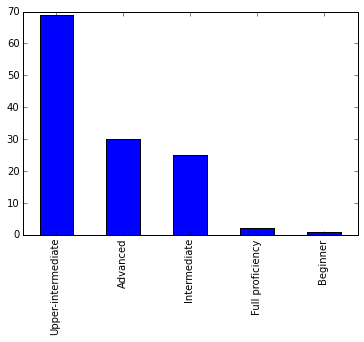

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
A = Data[u'Какой ваш уровень владения английским языком?'].dropna()

A.value_counts().plot(kind="bar")

## NumPy

In [29]:
import numpy as np

#### 1. (1 балл)  Дан двумерный массив размера m x n. Определить одинакова ли сумма элементов во всех строках и столбцах.


In [35]:
def sum_elem(A):
    s1 = A.sum(axis = 1)
    s2 = A.sum(axis = 0)
    return np.all (s2 == s1[0]) & np.all (s1 == s2[0]) 

In [36]:
A = np.array([[1,2,1], [2,1,1] , [1,1,2]])
sum_elem(A)

True

#### 3. (1 балл) Даны матрица $А = (a)_{i,j}$ и матрица $В = (b)_{i,j}$ размера n x n. Найти матрицу  $С = (c)_{i,j}$ такую, что ее элементы $c_{i,j} = a_{i,j}^2*b_{j,i} + a_{i,i}*b_{j,j}$

In [37]:
def matr_C(A, B):
    prod = np.dot(np.diag(A).reshape(A.shape[0], 1), np.diag(B).reshape(1, B.shape[0]))
    
    return A**2 * B.transpose() + prod

In [33]:
A = np.array([[1,2,1], 
              [2,1,1], 
              [1,1,2]])

B = np.array([[2,1, 1], 
              [2,1,1], 
              [1,1,2]])

In [34]:
matr_C(A, B)

array([[ 4,  9,  3],
       [ 6,  2,  3],
       [ 5,  3, 12]])